In [ ]:
import json as json
import pathlib as pl
from datetime import datetime
from os import path

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from numpy import array
from numpy.linalg import norm

gain = 1.5
rcParams[ 'figure.figsize' ] = [ gain * 6.4, gain * 4.8 / 2 ]

In [621]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.fromisocalendar( 2024, 37, 2 ).date():
		print( str( v ).split( '_' )[ -1 ], end = '\t' )
		print( datetime.fromtimestamp( path.getctime( v ) ), end = '\t' )
		try:
			record = pd.read_csv( f'{v}/logs.txt', sep = '\t' ).shape[ 0 ]
			with open( f'{v}/config.json' ) as f:
				conf = json.load( f )
		except:
			print( 'unable to read' )
		planned = array( conf[ 'target_trajectory' ] ).shape[ 0 ] // 2
		print( f'{record=}\t{planned=}\t{record == planned}' )

1725981792	2024-09-10 17:23:12.607056	record=1000	planned=1000	True
1725982395	2024-09-10 17:33:15.209467	record=1000	planned=1000	True
1725983462	2024-09-10 17:51:02.265681	record=500	planned=500	True
1725984151	2024-09-10 18:02:31.485258	record=200	planned=200	True
1725984674	2024-09-10 18:11:14.770524	record=200	planned=200	True
1725985581	2024-09-10 18:26:21.489613	record=500	planned=500	True
1725985667	2024-09-10 18:27:47.794658	record=500	planned=500	True
1725985778	2024-09-10 18:29:38.993805	record=500	planned=500	True
1725987609	2024-09-10 19:00:09.313886	record=500	planned=500	True
1725987889	2024-09-10 19:04:49.125741	record=1000	planned=1000	True
1725988336	2024-09-10 19:12:16.504329	record=1000	planned=1000	True
1725990436	2024-09-10 19:47:16.871415	record=1000	planned=1000	True
1725992307	2024-09-10 20:18:27.493109	record=1000	planned=1000	True
1726000711	2024-09-10 22:38:31.482089	record=2000	planned=2000	True
1726001254	2024-09-10 22:47:34.902194	record=2000	planned=2000

In [622]:
folder = pl.Path( './plots/three_robots_chain_1726157070' )
data = pd.read_csv( f'{folder}/logs.txt', sep = '\t' )
with open( f'{folder}/config.json' ) as f:
	conf = json.load( f )
data[ 'time' ] = [ i * conf[ 'time_step' ] for i in data.index ]

In [623]:
def disp( d: dict, prefix: str = '' ):
	for k, v in d.items():

		if isinstance( v, dict ):
			print( prefix + k + ':' )
			disp( v, prefix + '\t' )
			continue

		if isinstance( v, list ):
			if len( v ) > 0 and isinstance( v[ 0 ], dict ):
				print( prefix + k + ':' )
				disp( { str( i ): e for i, e in enumerate( v ) }, prefix + '\t' )
				continue

			l = array( v ).shape
			print( prefix + k + ':', v if sum( l ) < 10 else l )
			continue

		print( prefix + k + ':', v )


disp( conf )

model_dynamics: three_robots_chain
time_step: 0.01
kwargs:
	weight: [0.0, 0.0, 112.81500000000001]
	buoyancy: [0.0, 0.0, -120.0]
	center_of_mass: [0.0, 0.0, 0.0]
	center_of_volume: [0.0, 0.0, -0.02]
	inverted_inertial_matrix: (6, 6)
	hydrodynamic_matrix: (6, 6)
state: (36,)
actuation: (18,)
record: True
previous_states: (1, 36)
previous_actuations: (1, 18)
model: None
horizon: 25
target_trajectory: (4000, 1, 18)
objective: three_robot_chain_objective
time_steps_per_actuation: 25
guess_from_last_solution: True
tolerance: 0.0001
max_iter: 1000
bounds:
	lb: (18,)
	ub: (18,)
	keep_feasible: (18,)
constraints:
	0:
		fun: constraint_f
		lb: (225,)
		ub: (225,)
		finite_diff_rel_step: None
		finite_diff_jac_sparsity: None
		jac: 2-point
		hess: None
		keep_feasible: False
result_shape: [1, 1, 18]
raw_result: None
result: (1, 1, 18)
pose_weight_matrix: (25, 18, 18)
actuation_derivative_weight_matrix: (1, 18, 18)
objective_weight: 10.0
final_weight: 10.0
predicted_trajectories: []
candidate_act

In [624]:
conf[ 'constraints' ][ 0 ][ 'ub' ][ :225 // 25 ]

[3.00001, 3.00001, 2.8, 2.8, 2.8, 2.8, 3.0, 3.0, 3.0]

In [625]:
conf[ 'constraints' ][ 0 ][ ('lb') ][ :225 // 25 ]

[-inf, -inf, 0.4, 0.4, -inf, -inf, -inf, -inf, -inf]

In [626]:
data.tail( 10 )

,index,sim_time,step_time,success,C01,C12,D01,D12,H01,H12,...,state_r2,speed_r0,speed_r1,speed_r2,actuation_r0,actuation_r1,actuation_r2,objective,Unnamed: 20,time
1990,1990,4188.454504,2.374101,True,1.143442,1.515182,1.182675,1.193388,0.929223,1.406895,...,"[1.826988897164178, -0.5456296185254262, 0.9701923739533838, -0.00010124743010148408, -0.00039915523316083444, -8.922001055810805e-05]","[0.031724203988945, -0.004961452064898311, 0.000364476217172418, -0.0075224100181002255, 0.005398607904485785, -0.013492865326321948]","[-0.2518050217472756, 0.017997372062404586, -0.0317507390871614, -2.1288215033438785e-05, -0.00041455971523301105, -0.0011456113289867547]","[0.38404592163442286, -0.06291459743500026, 0.09730857414964512, 0.004184175698190428, 0.007043470741133454, 0.007288679629882957]","[-2.5809231639084493, 2.5682851127386197, 6.289625869241843, 0.000625395026827667, 0.004150177495302951, -0.0051790276258484]","[-37.925046123094255, -75.24112909700614, -64.77925309331398, 0.0037977967966472317, -0.001614518356992794, -0.005892102423885605]","[86.36040142835434, 19.52382612639859, -36.68126544727243, -0.00048811400261352235, 0.003313068791233258, -0.002309016783513624]",6.241282,NaN,19.90
1991,1991,4189.003743,0.514981,True,1.139316,1.502385,1.184048,1.198664,0.927349,1.404428,...,"[1.8311246460446187, -0.5461305069813774, 0.9709233019216404, -5.948419140494638e-05, -0.00032738125481264843, -1.700510657942372e-05]","[0.029667960662436543, -0.0033445059890506584, -0.00041973009330600755, -0.007444505120145296, 0.005752116764693143, -0.013820241251707823]","[-0.27140103095954193, -0.05140545155719266, -0.08989226631768514, 0.00041441005748578874, -0.0005332878503107598, -0.0015162312245751049]","[0.44319776164877267, -0.03720889834450456, 0.04853221159967448, 0.004172671154857836, 0.007308562477963528, 0.007155354604069732]","[-2.483960550420897, 1.8830777991332441, 6.28330260813613, 0.0010199935053783883, 0.003787149453358355, -0.004282064430974624]","[-21.482137875456527, -79.71896056636221, -59.36282021897464, 0.00381155166909288, -0.0015443348817751799, -0.005836763298709311]","[66.36040142835434, 29.872432594971723, -49.285639908576414, -0.0006694552187996717, 0.002866717344840898, -0.0026387450138167]",6.345526,NaN,19.91
1992,1992,4189.344529,0.306009,True,1.134740,1.488345,1.185436,1.204495,0.925016,1.401618,...,"[1.8357661352618477, -0.5463283151656876, 0.9711102955460686, -1.7918641917245582e-05, -0.0002531478533957464, 5.377332893159742e-05]","[0.027689321557259037, -0.002315771787832128, -0.0012129876476582092, -0.0073303707651666, 0.006075803616030054, -0.014092869574032541]","[-0.2767426020458892, -0.12508901247150522, -0.1435757087738326, 0.0008522574340509823, -0.0006473370160907263, -0.0018850098620679984]","[0.48513589845831395, -0.002340881363999665, -0.011449399659201517, 0.004143491940000533, 0.0075358793151872085, 0.0070007918432050086]","[-2.3869979369333447, 1.1978704855278686, 6.276979347030417, 0.0014145919839291096, 0.0034241214114137586, -0.0033851012361008487]","[-5.0392296278187985, -84.19679203571829, -53.9463873446353, 0.003825306541538528, -0.0014741514065575658, -0.005781424173533016]","[46.360401428354336, 40.22103906354486, -61.8900143698804, -0.0008507964349858211, 0.002420365898448538, -0.0029684732441197766]",6.678244,NaN,19.92
1993,1993,4189.726815,0.347137,True,1.129894,1.473679,1.186784,1.210620,0.922315,1.398528,...,"[1.8407408185070895, -0.5461310769856237, 0.9706409524911656, 2.3272270470812847e-05, -0.000176835217607475, 0.0001229026359013793]","[0.025788579287909473, -0.001878446646653538, -0.0020153372659419107, -0.007180018648185858, 0.0063690528724337, -0.014310510247816113]","[-0.2677797020358676, -0.2030765540373421, -0.1927809404340169, 0.0012916052666942716, -0.0007565145629959586, -0.0022519391683141266]","[0.5097999176465978, 0.04173914574657152, -0.08268684576680892, 0.00409660356065831, 0.007724914396482188, 0.006824898228649444]","[-2.2900353234457924, 0.512663171

In [627]:
state_r0 = data[ 'state_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r1 = data[ 'state_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r2 = data[ 'state_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

speed_r0 = data[ 'speed_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r0[ 'l_norm' ] = norm( speed_r0[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r0[ 'a_norm' ] = norm( speed_r0[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r1 = data[ 'speed_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r1[ 'l_norm' ] = norm( speed_r1[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r1[ 'a_norm' ] = norm( speed_r1[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r2 = data[ 'speed_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r2[ 'l_norm' ] = norm( speed_r2[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r2[ 'a_norm' ] = norm( speed_r2[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

actuation_r0 = data[ 'actuation_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r1 = data[ 'actuation_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r2 = data[ 'actuation_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

n_frames = len( conf[ 'target_trajectory' ] )
traj = array( conf[ 'target_trajectory' ] )[ :n_frames // 2, :, : ]

# Errors

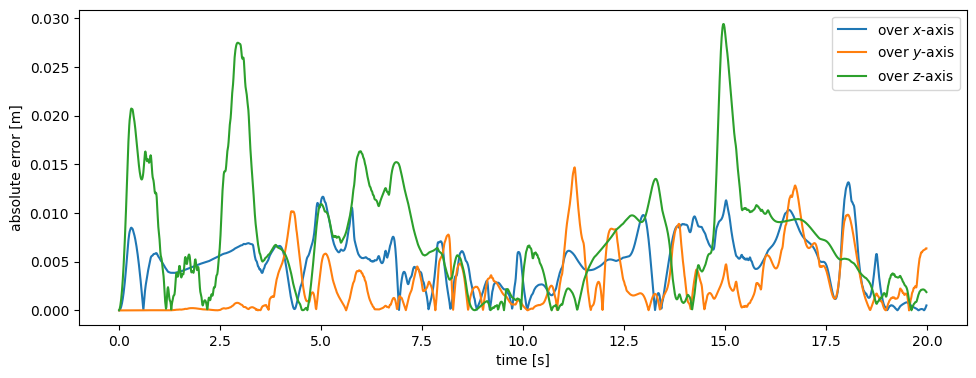

In [628]:
plt.plot( data[ 'time' ], abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] ) )
plt.legend( [ 'over $x$-axis', 'over $y$-axis', 'over $z$-axis' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'absolute error [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/error.png', dpi = 300 )

In [629]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).describe()

,x,y,z
count,2.000000e+03,2.000000e+03,2000.000000
mean,4.975698e-03,2.754362e-03,0.007237
std,2.766443e-03,2.975592e-03,0.005869
min,7.628425e-09,7.040716e-16,0.000005
25%,2.853331e-03,4.526297e-04,0.002578
50%,5.110359e-03,1.681814e-03,0.006019
75%,6.572315e-03,4.113712e-03,0.010016
max,1.315239e-02,1.468695e-02,0.029404


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

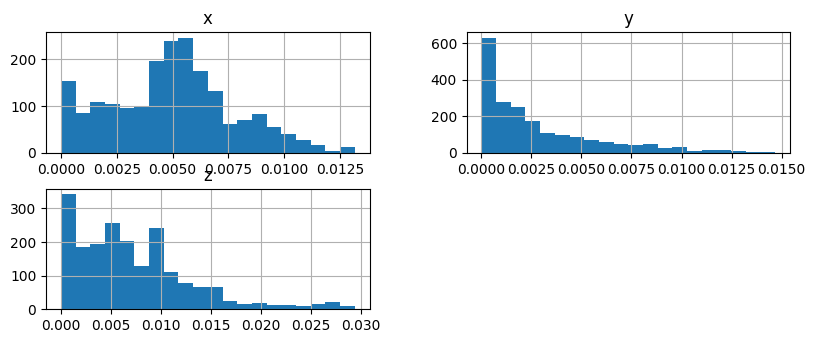

In [630]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).hist( bins = 20 )

<Axes: >

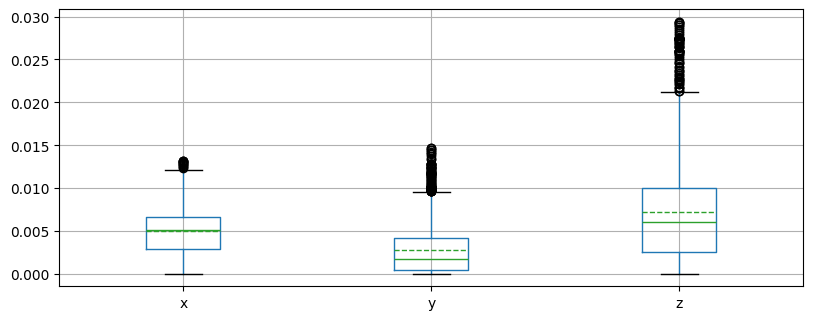

In [631]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).boxplot( meanline = True, showmeans = True )

In [632]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).describe()

,0
count,2000.000000
mean,0.010212
std,0.005601
min,0.000031
25%,0.006021
50%,0.009845
75%,0.013204
max,0.031282


array([[<Axes: title={'center': '0'}>]], dtype=object)

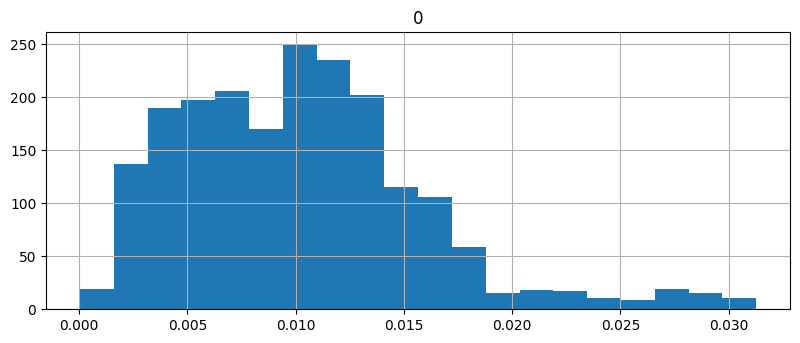

In [633]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).hist( bins = 20 )

<Axes: >

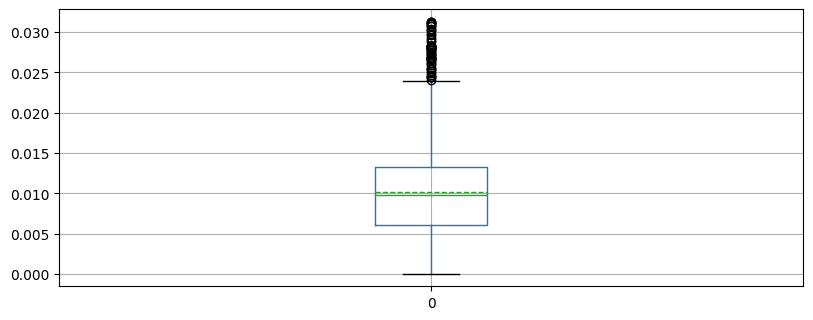

In [634]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).boxplot(
		meanline = True,
		showmeans = True
		)

# Constraints

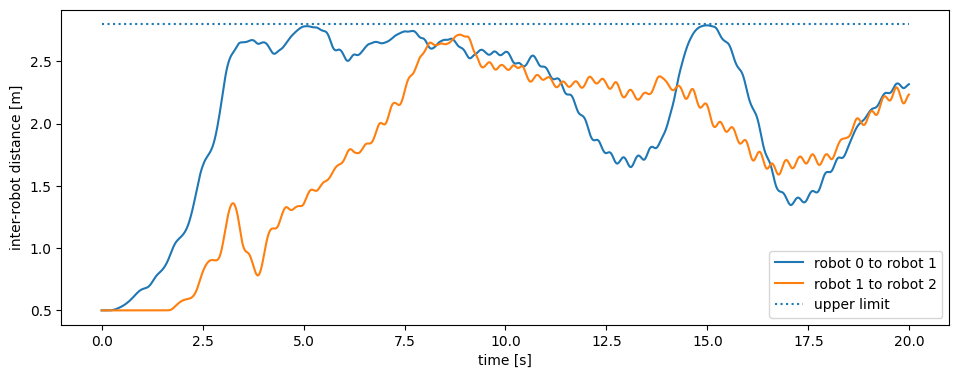

In [635]:
plt.plot( data[ 'time' ], norm( state_r1[ [ 'x', 'y', 'z' ] ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.plot( data[ 'time' ], norm( state_r2[ [ 'x', 'y', 'z' ] ] - state_r1[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 4 ], 0, data[ 'time' ].max(), linestyles = ':' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'inter-robot distance [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/inter_robot_distance.png', dpi = 300 )

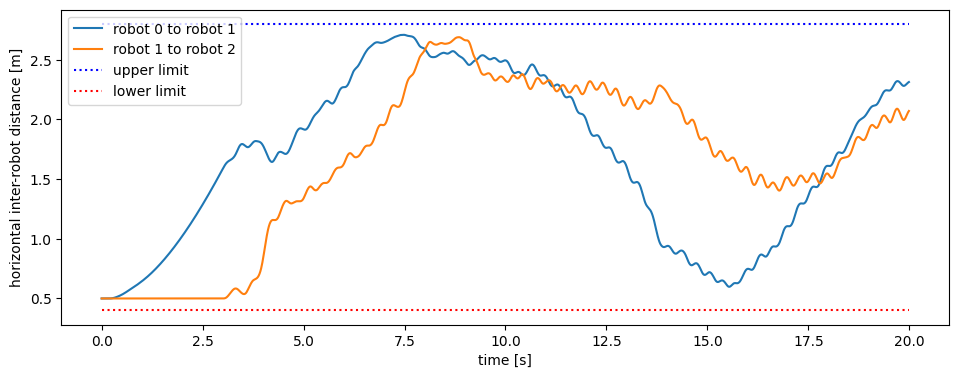

In [636]:
plt.plot( data[ 'time' ], norm( state_r1[ [ 'x', 'y' ] ] - state_r0[ [ 'x', 'y' ] ], axis = 1 ) )
plt.plot( data[ 'time' ], norm( state_r2[ [ 'x', 'y' ] ] - state_r1[ [ 'x', 'y' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 2 ], 0, data[ 'time' ].max(), linestyles = ':', color = 'b' )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'lb' ][ 2 ], 0, data[ 'time' ].max(), linestyles = ':', color = 'r' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit', 'lower limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'horizontal inter-robot distance [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/horizontal_inter_robot_distance.png', dpi = 300 )

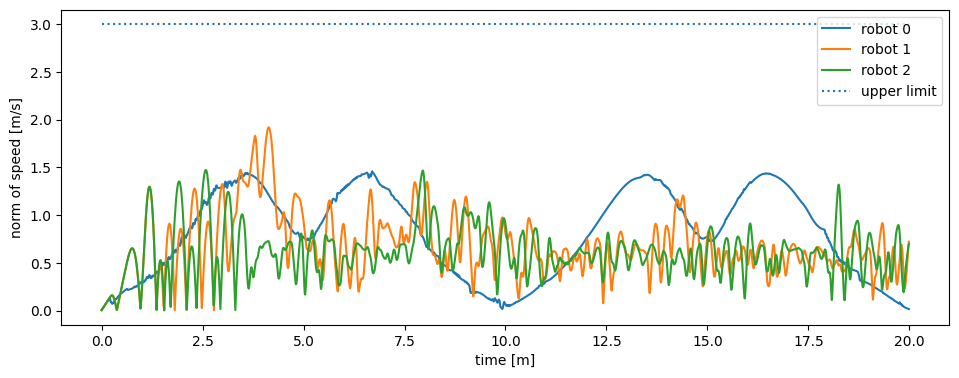

In [637]:
plt.plot( data[ 'time' ], speed_r0[ 'l_norm' ] )
plt.plot( data[ 'time' ], speed_r1[ 'l_norm' ] )
plt.plot( data[ 'time' ], speed_r2[ 'l_norm' ] )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 6 ], 0, data[ 'time' ].max(), linestyles = ':' )
plt.legend( [ 'robot 0', 'robot 1', 'robot 2', 'upper limit' ] )
plt.xlabel( 'time [m]' )
plt.ylabel( 'norm of speed [m/s]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/robots_speed.png', dpi = 300 )

# States

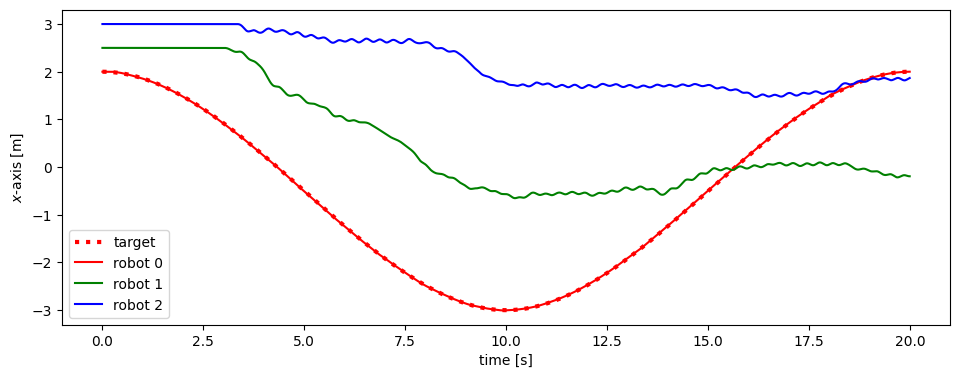

In [638]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 0 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'x' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'x' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'x' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$x$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_x.png', dpi = 300 )

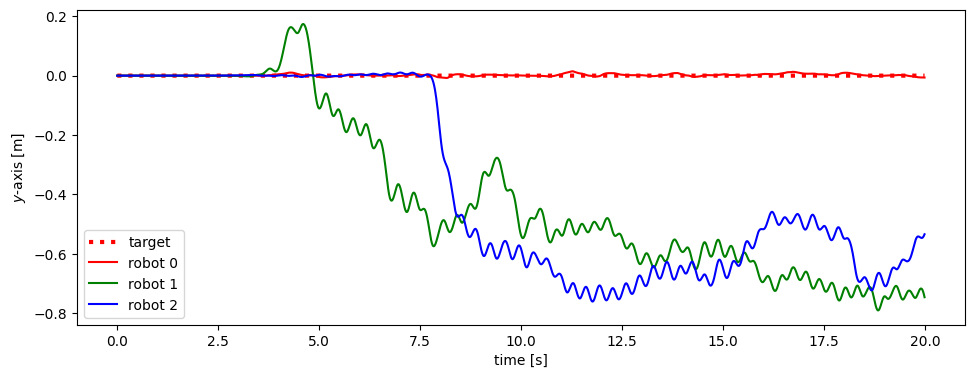

In [639]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 1 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'y' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'y' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'y' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$y$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_y.png', dpi = 300 )

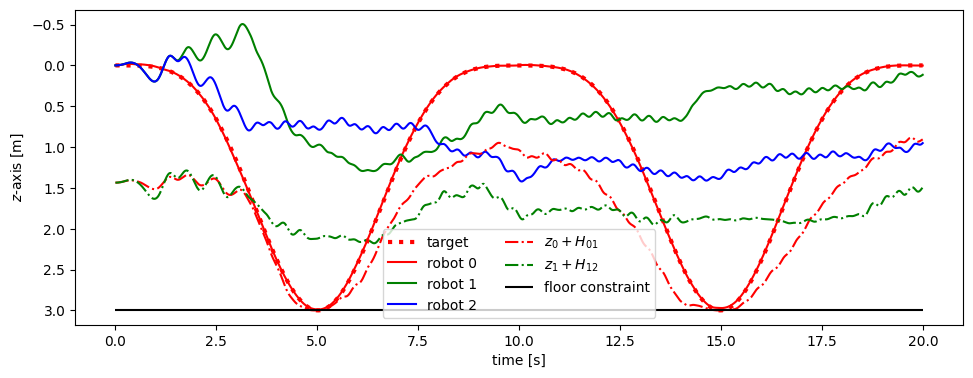

In [640]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 2 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'z' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'z' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'z' ], 'b' )
plt.plot( data[ 'time' ], data[ 'H01' ] + state_r0[ 'z' ], '-.', color = 'r' )
plt.plot( data[ 'time' ], data[ 'H12' ] + state_r1[ 'z' ], '-.', color = 'g' )

plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 0 ], 0, data[ 'time' ].max(), 'k' )
plt.legend(
		[ 'target', 'robot 0', 'robot 1', 'robot 2', '$z_0 + H_{01}$', '$z_1 + H_{12}$', 'floor constraint' ],
		ncol = 2
		)
plt.gca().invert_yaxis()
plt.xlabel( 'time [s]' )
plt.ylabel( '$z$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_z.png', dpi = 300 )

# Speeds

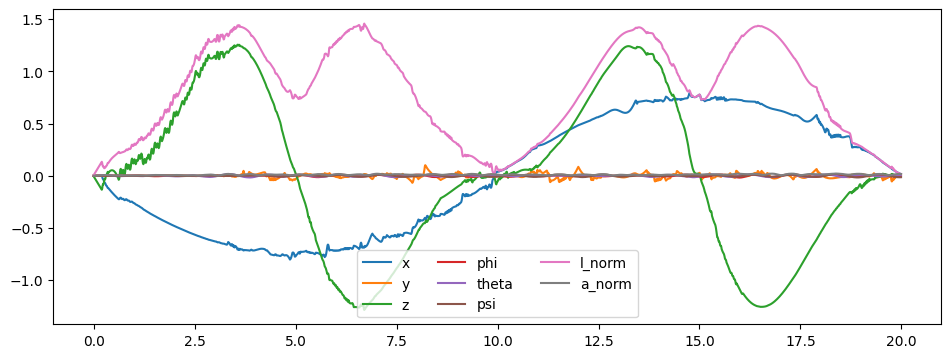

In [641]:
plt.plot( data[ 'time' ], speed_r0 )
plt.legend( speed_r0.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r0.png', dpi = 300 )

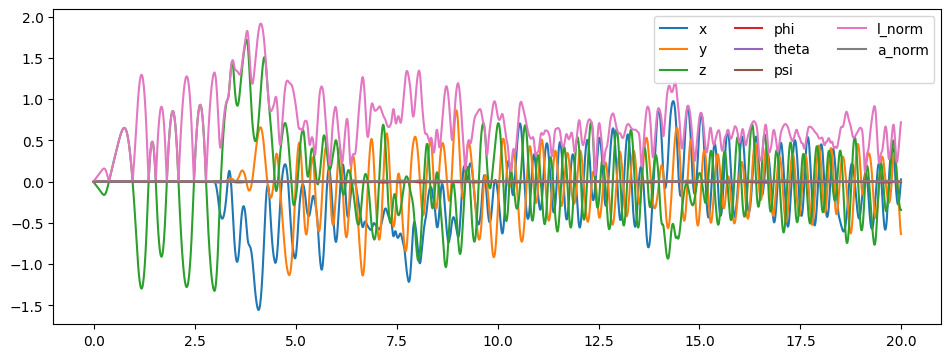

In [642]:
plt.plot( data[ 'time' ], speed_r1 )
plt.legend( speed_r1.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r1.png', dpi = 300 )

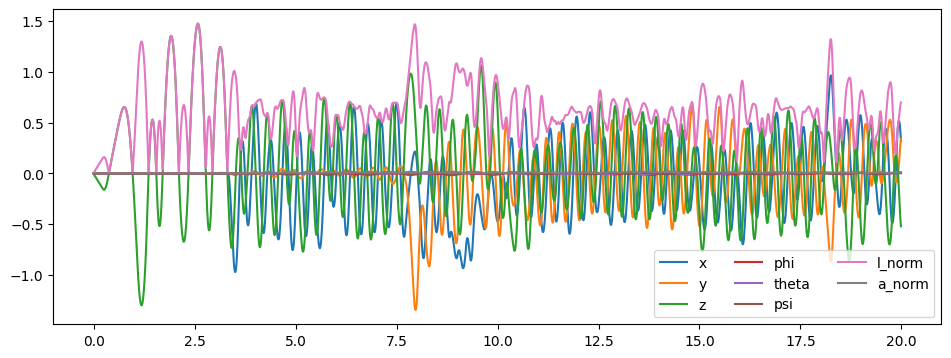

In [643]:
plt.plot( data[ 'time' ], speed_r2 )
plt.legend( speed_r2.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r2.png', dpi = 300 )

# Actuations

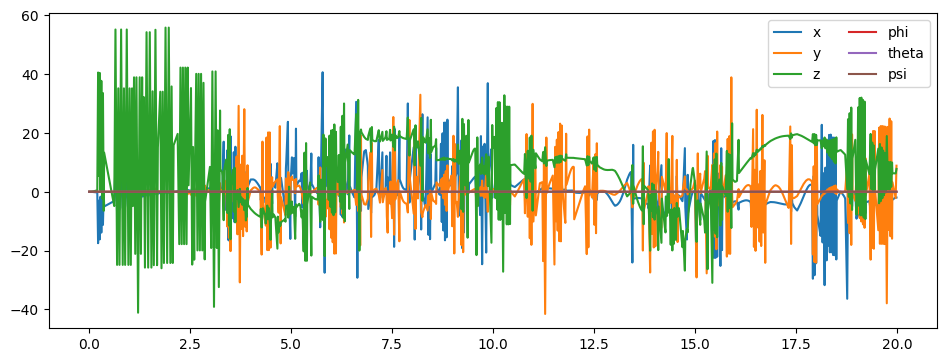

In [644]:
plt.plot( data[ 'time' ], actuation_r0 )
plt.legend( actuation_r0.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r0.png', dpi = 300 )

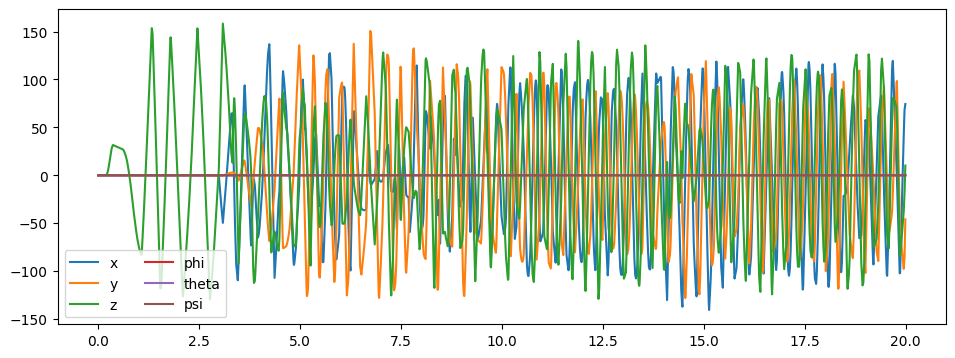

In [645]:
plt.plot( data[ 'time' ], actuation_r1 )
plt.legend( actuation_r1.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r1.png', dpi = 300 )

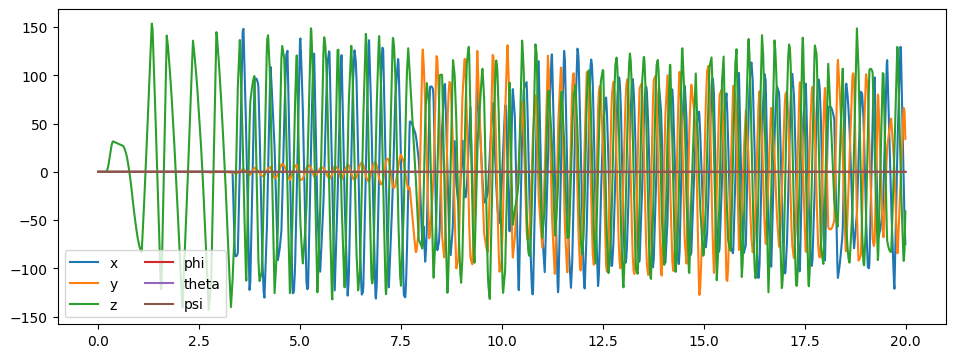

In [646]:
plt.plot( data[ 'time' ], actuation_r2 )
plt.legend( actuation_r2.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r2.png', dpi = 300 )

# Time

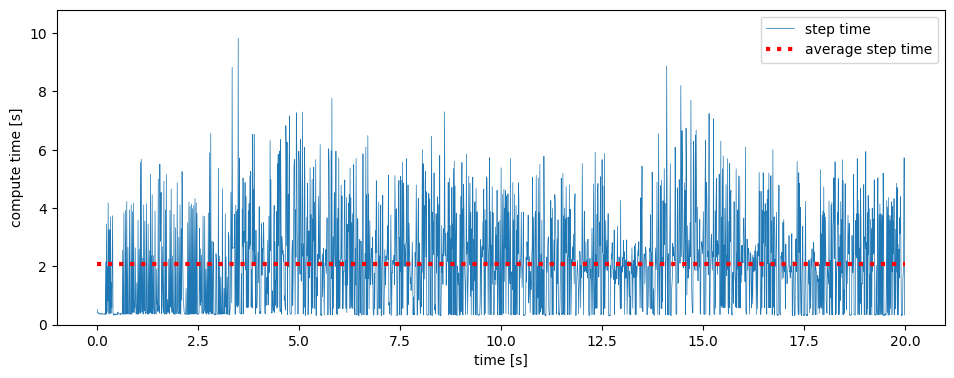

In [647]:
plt.plot( data[ 'time' ], data[ 'step_time' ], linewidth = .5 )
plt.hlines( data.step_time.mean(), 0, data[ 'time' ].max(), linestyles = ':', color = 'r', linewidth = 3 )
plt.ylabel( 'compute time [s]' )
plt.xlabel( 'time [s]' )
plt.gca().set_ylim( 0, data.step_time.max() * 1.1 )
plt.legend( [ 'step time', 'average step time' ] )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/compute_time.png', dpi = 300 )

In [648]:
data[ 'step_time' ].describe()

count    2000.000000
mean        2.079619
std         1.696868
min         0.303485
25%         0.389608
50%         1.865823
75%         3.122728
max         9.822751
Name: step_time, dtype: float64

<Axes: >

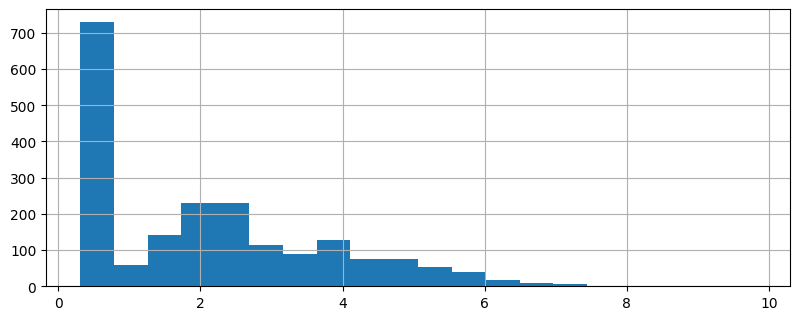

In [649]:
data[ 'step_time' ].hist( bins = 20 )

<Axes: >

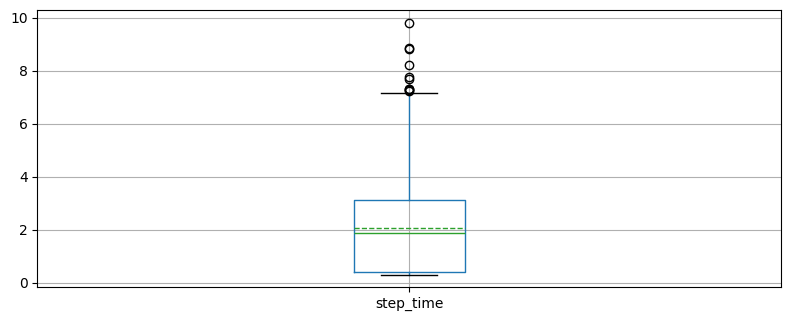

In [650]:
data[ 'step_time' ].to_frame().boxplot( meanline = True, showmeans = True )